## Wilfrido Matthew Enverga 
## Student No. 83234864

### *Research Question/Interests*

I am interested in to see if the region/location of a person holds a significance in terms of rising medical charges for patients in the United States. Moreover, I would like to analyze if there is any connection between the charges to a medical patient and the lifestyle of a patient as well using the 'bmi' and 'smoker' information. Perhaps this will highlight any medical inequalities with different regions in the United States and through this analysis, I hope to shed light on this topic. Given the time constraints I am unsure whether I could delve into this into detail but it would be fascinating to see whether a patient's location and lifestyle could affect medical charges.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [8]:
data_raw = pd.read_csv("../data/raw/insurance/insurance.csv")
data_raw

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# *Milestone 3*

## *Task 1: Exploratory Data Analysis (EDA)*

##### I will be cleaning up the data in one of the later tasks, but for now I will be looking at the general shape, important attributes to the study,  correlation between these attributes in terms of medical charges, and analyzing the impact of these specific attributes to the possibility of rising medical charges.

In [4]:
data_raw.shape

(1338, 7)

In [5]:
data_raw.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
data_raw.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data_raw.smoker.unique()
data_raw.bmi.unique()
data_raw.children.unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

<AxesSubplot:>

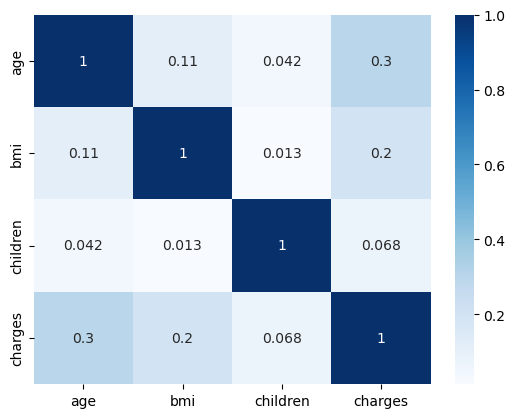

In [32]:
data_raw_mx = data_raw.corr()
sns.heatmap(data_raw_mx, annot=True, cmap='Blues')

##### Moving forward, I have decided that the 'age' and 'children' columns will not be as useful in my analysis. I will specifically look into the 'bmi', 'smoker', and 'region' columns as these will help me explain how lifestyle and location affects patient medical charges in the United States. 

Text(0.5, 1.0, 'Medical charge correspondence with Regions in the United States')

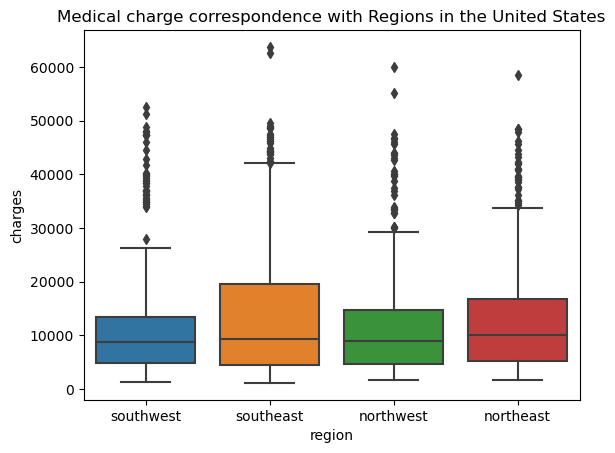

In [22]:
sns.boxplot(x='region',y='charges', data=data_raw)
plt.title("Medical charge correspondence with Regions in the United States")

##### This boxplot displays a 5 number summary for medical expenses in four (4) different regions in the United States. It is clear that the southeast region has a higher average when it comes to being billed by health insurance. The southeast is charges higher than those of its other region counterparts, not by a large margin compared to the northeast however. This implies that there are more medical charges to patients in the southeast and perhaps more access to healthcare benefits than the other regions. 

Text(0.5, 1.0, 'Number of medical patients from 4 different regions in the United States')

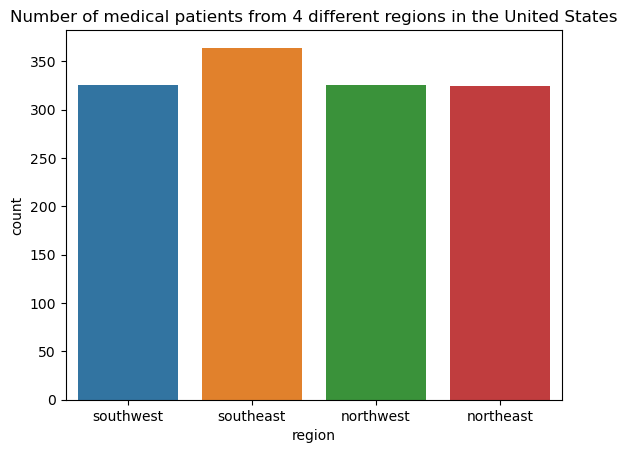

In [58]:
sns.countplot(x='region', data=data_raw)
plt.title("Number of medical patients from 4 different regions in the United States")

##### This countplot shows that the medical expenses dataset gathered the data mostly from patients residing in the southeast region of the United States with, generating data for around 360 patients. The rest of the dataset is gathered from patients residing in the southwest, northwest, and northeast regions with around 310 patients in each region. It is possible that more patient and medical expense data was gathered here due to a higher population or higher amount of medical cases. 

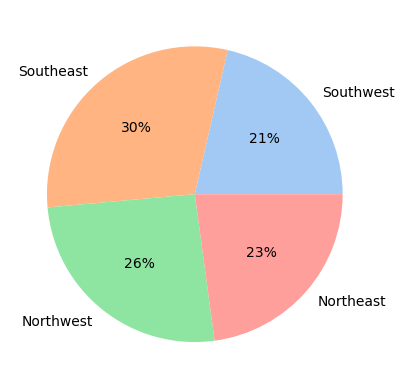

In [17]:
data = [30, 42, 36, 32]

labels = ['Southwest', 'Southeast', 'Northwest', 'Northeast']

colors = sns.color_palette('pastel')[0:7]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')

plt.show()


##### The pie chart shows the percentages of smokers in each significant region in the study. As it turns out, it seems that majority of the smokers in the patient data come from the Southeast region of the United States. 

# Task 2: Data Analysis Pipeline

#### Step 1: Load Data 
#### Step 2: Clean Data 

##### I will be removing the 'children' column for the cleaned up data. I believe that the only columns that will be useful for gathering my evidence wil be the 'charges', 'bmi', 'age', 'smoker' and 'region' columns as those will help me determine if the region holds a significance in the amount of medical charges for patients in the United States, not to mention if lifestyle correlates with the medical charges by insurance companies throughout 4 different regions. 

In [7]:
data_raw = pd.read_csv("../data/raw/insurance/insurance.csv")

In [8]:
data_clean = data_raw.copy().drop(['children', 'sex'], axis=1).dropna(axis=0)
data_clean.reset_index()
data_clean.head()
data_clean

,age,bmi,smoker,region,charges
0,19,27.900,yes,southwest,16884.92400
1,18,33.770,no,southeast,1725.55230
2,28,33.000,no,southeast,4449.46200
3,33,22.705,no,northwest,21984.47061
4,32,28.880,no,northwest,3866.85520
...,...,...,...,...,...
1333,50,30.970,no,northwest,10600.54830
1334,18,31.920,no,northeast,2205.98080
1335,18,36.850,no,southeast,1629.83350
1336,21,25.800,no,southwest,2007.94500


In [13]:
data_clean['smoker'] = data_clean['smoker'].map({'yes': 1, 'no': 0})
data_clean

,age,bmi,smoker,region,charges
0,19,27.900,1,southwest,16884.92400
1,18,33.770,0,southeast,1725.55230
2,28,33.000,0,southeast,4449.46200
3,33,22.705,0,northwest,21984.47061
4,32,28.880,0,northwest,3866.85520
...,...,...,...,...,...
1333,50,30.970,0,northwest,10600.54830
1334,18,31.920,0,northeast,2205.98080
1335,18,36.850,0,southeast,1629.83350
1336,21,25.800,0,southwest,2007.94500


In [9]:
data_clean['bmi'] = data_clean['bmi'].round(decimals = 2)
data_clean['charges'] = data_clean['charges'].round(decimals = 2)
data_clean

,age,bmi,smoker,region,charges
0,19,27.90,yes,southwest,16884.92
1,18,33.77,no,southeast,1725.55
2,28,33.00,no,southeast,4449.46
3,33,22.70,no,northwest,21984.47
4,32,28.88,no,northwest,3866.86
...,...,...,...,...,...
1333,50,30.97,no,northwest,10600.55
1334,18,31.92,no,northeast,2205.98
1335,18,36.85,no,southeast,1629.83
1336,21,25.80,no,southwest,2007.94


# Task 3: Method Chaining 

##### Now I will be creating a function using a .py file with the following code:

import pandas as pd 

def load_and_process(rawData):
    
    df_clean = (pd.read_csv(rawData).drop(['children', 'sex'], axis=1).dropna(axis=0))
    
    df_clean['smoker'] = df_clean['smoker'].map({'yes': 1, 'no': 0})
    df_clean['bmi'] = df_clean['bmi'].round(decimals = 2)
    df_clean['charges'] = df_clean['charges'].round(decimals = 2)
    
    return df_clean
    
    
    
##### Using this code, I am now able to create and call a function that can load and process data which is essentially the same as my cleaned up data. Now all i have to do is import the function by giving it a name to call. In this case i am using p1 as my function to call.

import project_functions as p1
    

In [1]:
import project_functions1 as p1

##### Afterwards, I assign the load and process function with the "p1" function I just created to df_clean. When I call "df_clean" it gives me all the rows and columns similar to that I have above with "data_clean"

In [4]:
df_clean = p1.load_and_process("../data/raw/insurance/insurance.csv")
df_clean

,age,bmi,smoker,region,charges
0,19,27.90,1,southwest,16884.92
1,18,33.77,0,southeast,1725.55
2,28,33.00,0,southeast,4449.46
3,33,22.70,0,northwest,21984.47
4,32,28.88,0,northwest,3866.86
...,...,...,...,...,...
1333,50,30.97,0,northwest,10600.55
1334,18,31.92,0,northeast,2205.98
1335,18,36.85,0,southeast,1629.83
1336,21,25.80,0,southwest,2007.94
